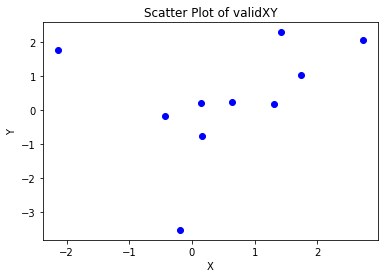

In [13]:
import matplotlib.pyplot as plt

# Your data as a list of (x, y) pairs
validXY = [
    [-2.1346,  1.7622],
    [ 1.7418,  1.0315],
    [ 2.7213,  2.0731],
    [ 0.6380,  0.2541],
    [ 1.3117,  0.1712],
    [ 0.1612, -0.7616],
    [-0.4296, -0.1708],
    [ 0.1508,  0.2023],
    [ 1.4257,  2.2960],
    [-0.1912, -3.5186]
]

# Separate the list of pairs into x-values and y-values
x_vals = [p[0] for p in validXY]
y_vals = [p[1] for p in validXY]

# Create the scatter plot
plt.scatter(x_vals, y_vals, color='blue', marker='o')

# Label axes and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of validXY')

# Show the figure
plt.show()


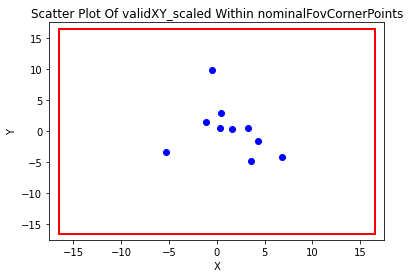

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# The four corner points
# corner_points = [
#    (-16.2354482255754, -16.8542557444577),
#    (15.4644413643944,  -16.5218378774065),
#    (15.1228784789087,   16.0785565433380),
#    (-14.8579398723619,  16.1366632227080)
# ]

# from mht01 header.SI.hScan2D.nominalFovCornerPoints  
corner_points = [
    (-16.5, -16.5),
    (16.5, -16.5),
    (16.5, 16.5),
    (-16.5, 16.5)
]



# Your data points
validXY = [
    (-2.1346,  1.7622),
    ( 1.7418,  1.0315),
    ( 2.7213,  2.0731),
    ( 0.6380,  0.2541),
    ( 1.3117,  0.1712),
    ( 0.1612, -0.7616),
    (-0.4296, -0.1708),
    ( 0.1508,  0.2023),
    ( 1.4257,  2.2960),
    (-0.1912, -3.5186)
]

# roiGroup.displayRois(1, 1).scanfields.transformParams 
# roiGroup.displayRois(1, 1).scanfields.transformParams.offsetX = -2.1346
# roiGroup.displayRois(1, 1).scanfields.transformParams.offsetY = 1.7622
# roiGroup.displayRois(1, 1).scanfields.transformParams.scaleX = 2.5
# roiGroup.displayRois(1, 1).scanfields.transformParams.scaleY - 2.5
# roiGroup.displayRois(1, 1).scanfields.transformParams.rotation
# roiGroup.displayRois(1, 1).scanfields.transformParams.shear

scale_factor = 2.5

# Scale each x and y by 2.5
validXY_scaled = [(x * scale_factor, y * scale_factor) for x, y in validXY]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a polygon (unfilled, red outline) from the four corner points
polygon = patches.Polygon(corner_points, closed=True, fill=False, edgecolor='red', linewidth=2)
ax.add_patch(polygon)

# Scatter the (x, y) data
x_vals = [p[0] for p in validXY_scaled]
y_vals = [1-p[1] for p in validXY_scaled] #note this is inverted/flipped along X-axis
ax.scatter(x_vals, y_vals, c='blue', marker='o')

# Set axis limits so the polygon is fully visible
x_corners = [p[0] for p in corner_points]
y_corners = [p[1] for p in corner_points]
ax.set_xlim(min(x_corners) - 1, max(x_corners) + 1)
ax.set_ylim(min(y_corners) - 1, max(y_corners) + 1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Scatter Plot Of validXY_scaled Within nominalFovCornerPoints')

plt.show()


In [22]:
scale_factor

2.5

In [27]:
validXY

[(-2.1346, 1.7622),
 (1.7418, 1.0315),
 (2.7213, 2.0731),
 (0.638, 0.2541),
 (1.3117, 0.1712),
 (0.1612, -0.7616),
 (-0.4296, -0.1708),
 (0.1508, 0.2023),
 (1.4257, 2.296),
 (-0.1912, -3.5186)]

In [28]:
validXY_scaled

[(-5.336499999999999, 4.4055),
 (4.3545, 2.5787500000000003),
 (6.803249999999999, 5.18275),
 (1.595, 0.63525),
 (3.27925, 0.428),
 (0.403, -1.9040000000000001),
 (-1.0739999999999998, -0.42700000000000005),
 (0.377, 0.50575),
 (3.56425, 5.739999999999999),
 (-0.47800000000000004, -8.7965)]

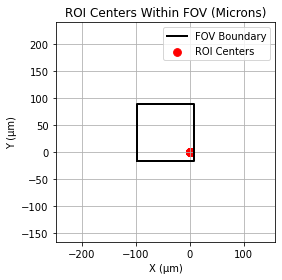

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. Inputs
# -----------------------------------------------

# ROI center positions in optical degrees
centerXY_deg = np.array([
    [-2.13455731800000,  1.76219822100000],
    [ 1.74180371700000,  1.03149380000000],
    [ 2.72125858500000,  2.07313627200000],
    [ 0.637973627100000, 0.254148671200000],
    [ 1.31167257500000,  0.171231857500000],
    [ 0.161201703100000, -0.761582296900000],
    [-0.429580586000000, -0.170799999100000],
    [ 0.150837101600000,  0.202325662700000],
    [ 1.42568309400000,  2.29597520900000],
    [-0.191194707800000, -3.51856635300000]
])

# Objective resolution from metadata (degrees per micron)
# deg_per_um = 0.0334  # Replace with actual value if different
# um_per_deg = 1 / deg_per_um
deg_per_um = 21.13
um_per_deg = 1 / deg_per_um #0.0473


# Convert to microns
centerXY_um = centerXY_deg * um_per_deg

# FOV boundary in microns from metadata
fovCorners_um = np.array([
    [-97.9282,  -15.5898],
    [  7.7218,  -15.5898],
    [  7.7218,   90.0602],
    [-97.9282,   90.0602]
])

# -----------------------------------------------
# 2. Plot ROIs within the FOV (micron space)
# -----------------------------------------------
fig, ax = plt.subplots()

# Draw the FOV boundary as a closed polygon
fov_poly = np.vstack([fovCorners_um, fovCorners_um[0]])  # loop back to start
ax.plot(fov_poly[:,0], fov_poly[:,1], 'k-', linewidth=2, label='FOV Boundary')

# Plot the ROI centers
ax.scatter(centerXY_um[:,0], -centerXY_um[:,1], c='red', s=60, label='ROI Centers')

# Label and style
ax.set_title('ROI Centers Within FOV (Microns)')
ax.set_xlabel('X (µm)')
ax.set_ylabel('Y (µm)')
ax.set_aspect('equal')
ax.legend()
ax.grid(True)

# Optional: restrict axis to FOV limits with some margin
x_margin = 150
y_margin = 150
ax.set_xlim(fovCorners_um[:,0].min() - x_margin, fovCorners_um[:,0].max() + x_margin)
ax.set_ylim(fovCorners_um[:,1].min() - y_margin, fovCorners_um[:,1].max() + y_margin)

plt.tight_layout()
plt.show()


In [58]:
# Your centerXY values in optical degrees
# ROI center positions in optical degrees
centerXY_deg = np.array([
    [-2.13455731800000,  1.76219822100000],
    [ 1.74180371700000,  1.03149380000000],
    [ 2.72125858500000,  2.07313627200000],
    [ 0.637973627100000, 0.254148671200000],
    [ 1.31167257500000,  0.171231857500000],
    [ 0.161201703100000, -0.761582296900000],
    [-0.429580586000000, -0.170799999100000],
    [ 0.150837101600000,  0.202325662700000],
    [ 1.42568309400000,  2.29597520900000],
    [-0.191194707800000, -3.51856635300000]
])



# Image dimensions
img_width = 512
img_height = 512

# Imaging FOV in degrees (from metadata)
fov_deg_x = [-4.6346, 0.3654]
fov_deg_y = [-0.7378, 4.2622]

# Convert degrees → pixels
pixelXY = np.zeros_like(centerXY_deg)
pixelXY[:, 0] = (centerXY_deg[:, 0] - fov_deg_x[0]) / (fov_deg_x[1] - fov_deg_x[0]) * img_width
pixelXY[:, 1] = (centerXY_deg[:, 1] - fov_deg_y[0]) / (fov_deg_y[1] - fov_deg_y[0]) * img_height

# Flip Y-axis for image-style origin
pixelXY[:, 1] = img_height - pixelXY[:, 1] + 1

# Round to integers
pixelXY = np.round(pixelXY).astype(int)


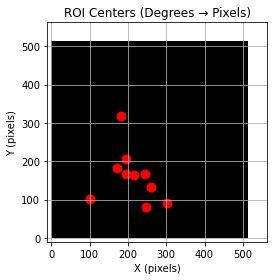

In [75]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(np.zeros((img_height, img_width)), cmap='gray', origin='upper')
plt.scatter(pixelXY[:, 0]/2.5, pixelXY[:, 1]/2.5, c='red', s=80)
plt.title("ROI Centers (Degrees → Pixels)")
plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.grid(True)
plt.xlim(-10, img_width+50)
plt.ylim(-10, img_height+50)
plt.tight_layout()
plt.show()


In [78]:
# Yes — those pixel values were directly calculated from your centerXY_deg values using the proper
# ScanImage metadata, specifically:

# The full imaging FOV in optical degrees from:
# header.SI.hRoiManager.imagingFovDeg
# Image size: 512 × 512
# No extra fudge factors — just scaled, then flipped to match image display orientation.

import numpy as np

# Image size
img_size = 512

# Verified FOV in optical degrees (from your header.SI.hRoiManager.imagingFovDeg)
# X goes from -4.6346 to 0.3654 → 5 degrees width
# Y goes from -0.7378 to 4.2622 → 5 degrees height
fov_deg_x = (-4.6346, 0.3654)
fov_deg_y = (-0.7378, 4.2622)

# ROI center positions in optical degrees
centerXY_deg = np.array([
    [-2.1346,  1.7622],
    [ 1.7418,  1.0315],
    [ 2.7213,  2.0731],
    [ 0.6380,  0.2541],
    [ 1.3117,  0.1712],
    [ 0.1612, -0.7616],
    [-0.4296, -0.1708],
    [ 0.1508,  0.2023],
    [ 1.4257,  2.2960],
    [-0.1912, -3.5186]
])

# Z values
z_values = np.array([7, 8, 8, 8, 9, 17, 17, 17, 25, 25])

# Convert from degrees to pixel coordinates
pixelX = (centerXY_deg[:, 0] - fov_deg_x[0]) / (fov_deg_x[1] - fov_deg_x[0]) * img_size
pixelY = (centerXY_deg[:, 1] - fov_deg_y[0]) / (fov_deg_y[1] - fov_deg_y[0]) * img_size

# Flip X and Y for top-left origin
pixelX = img_size - pixelX + 1
pixelY = img_size - pixelY + 1

# Round and clip to image bounds
pixelX = np.clip(np.round(pixelX), 1, img_size).astype(int)
pixelY = np.clip(np.round(pixelY), 1, img_size).astype(int)

# Combine with Z
coords = np.column_stack((pixelX, pixelY, z_values))

# Output in FIJI format
print("coords = newArray(")
for i, (x, y, z) in enumerate(coords):
    print(f"    {x}, {y}, {z}" + ("," if i < len(coords) - 1 else ""))
print(");")


coords = newArray(
    257, 257, 7,
    1, 332, 8,
    1, 225, 8,
    1, 411, 8,
    1, 420, 9,
    22, 512, 17,
    82, 455, 17,
    23, 417, 17,
    1, 202, 25,
    58, 512, 25
);
